In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df=pd.read_csv('icecream_sales_polyreg.csv')
df.head()

,Temperature,IceCreams_Sold
0,21.236204,1166.055661
1,38.521429,3397.035159
2,31.959818,2414.293364
3,27.959755,1853.341913
4,14.680559,623.449792


In [5]:
x_train,x_test,y_train,y_test=train_test_split(df[['Temperature']],df['IceCreams_Sold'],test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((80, 1), (20, 1), (80,), (20,))

In [8]:
poly=PolynomialFeatures(degree=2)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.transform(x_test)
model=LinearRegression()
model.fit(x_train_poly,y_train)
y_pred=model.predict(x_test_poly)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
rmse=np.sqrt(mse)
print(f'RMSE: {rmse}')
print(f'R^2 Score: {r2}')

RMSE: 15.947922840070058
R^2 Score: 0.9997554186066964


Text(0.5, 1.0, 'Ice Cream Sales vs Temperature')

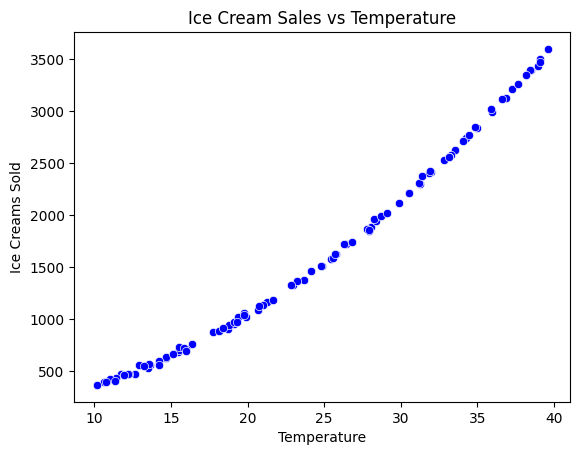

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.scatterplot(x=df['Temperature'],y=df['IceCreams_Sold'],color='blue')
plt.xlabel('Temperature')
plt.ylabel('Ice Creams Sold')
plt.title('Ice Cream Sales vs Temperature')

Text(0.5, 1.0, 'Actual vs Predicted Ice Cream Sales')

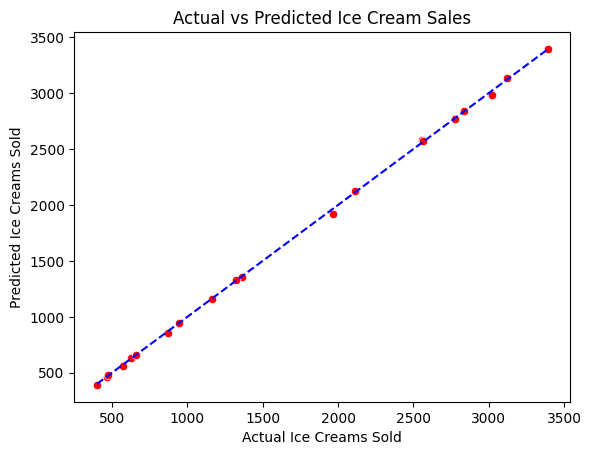

In [15]:
sns.scatterplot(x=y_test,y=y_pred,color='red')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color='blue',ls='--')
plt.xlabel('Actual Ice Creams Sold')
plt.ylabel('Predicted Ice Creams Sold')
plt.title('Actual vs Predicted Ice Cream Sales')